### Score: `[96]`

Q1. `[25]` good! 注意1.3 date.

Q2. `[8]` 缺少分列代码，可视化似乎有点问题（上传的源文件）。

Q3. `[49]` GOOD JOB! 注意3.9和3.10。

Q4. `[14]` 时间序列有点奇怪，最后一下问 your findings。

In [1]:
import pandas as pd

In [54]:
#1.1
#导入数据，sep='\t'用于指定文件中用于分隔值的字符，避免破坏数据结构，是TSV文件的标准分隔符（询问AI）
Sig_Eqs=pd.read_csv('earthquakes-2024-11-03_21-06-30_+0800.tsv',sep='\t')
#按国家来安排列死亡人数，然后进行求和（表里内容国家和死亡人数为大写，所以代码里也要大写，来自AI）
Deaths_of_country=Sig_Eqs.groupby('Country')['Deaths'].sum()
#用sort_values命令按降序排列前二十个
top20=Deaths_of_country.sort_values(ascending=False).head(20)

print(top20)

Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64


Year
-2000.0     1
-479.0      1
-426.0      1
-400.0      1
-373.0      1
           ..
 2012.0    34
 2013.0    20
 2015.0     1
 2017.0     1
 2019.0     1
Name: count, Length: 497, dtype: int64


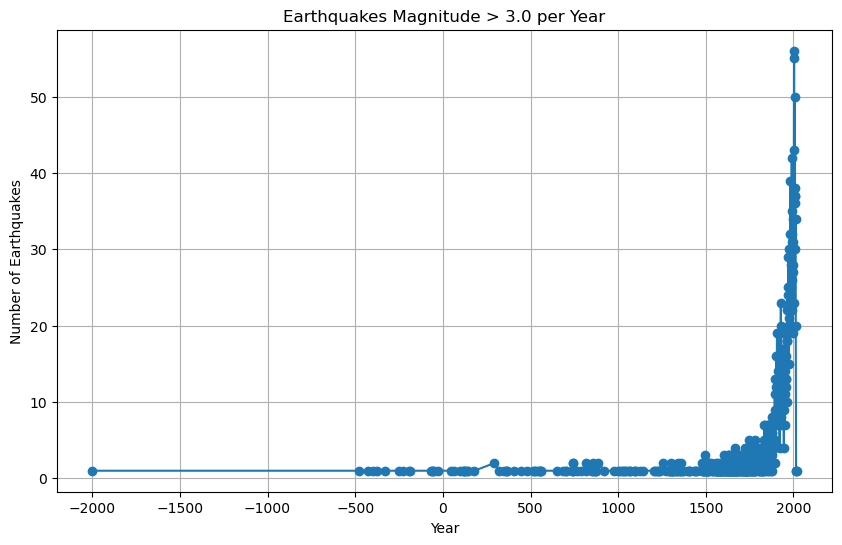

In [72]:
#1.2
import matplotlib.pyplot as plt
#筛选大于3.0级的地震
earthquakes_magnitude_gt_3=Sig_Eqs[Sig_Eqs['Ms'] > 3.0]

#按年份计算地震次数
earthquakes_per_year=earthquakes_magnitude_gt_3['Year'].value_counts().sort_index()
print(earthquakes_per_year)

#绘制时间序列图
plt.figure(figsize=(10, 6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('Earthquakes Magnitude > 3.0 per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

#趋势：三级以上的地震发生的次数随着时间的前进越来越多
#可能原因：1.监测技术发展，能我们能够检测到更多以前可能未被注意到的小地震。2.地区因素，某些地区可能因为地质构造活跃，如板块边界或断层带，这些地区的地震活动更为频繁。3.人类活动，某些人类活动，如水库建设，可能会增加地壳应力，从而增加地震发生的可能性。

In [ ]:
#1.3
def CountEq_LargestEq(country_name):
#找到特定国家的地震数据
    country_data=Sig_Eqs[Sig_Eqs['Country'] == country_name]    

#删除'Ms'列中NaN值的行
    country_data=country_data.dropna(subset=['Ms'])  
#如果country_data不为空
    if not country_data.empty:
        #找到'Ms'列中最大值的索引
        max_index=country_data['Ms'].idxmax()
        #找到最大地震的行
        largest_eq=country_data.loc[max_index]
        #提取最大地震的日期和地点信息
        largest_eq_info=(largest_eq['Year'], largest_eq['Location Name']) # NOTE: Date NOT ONLY YEAR
    else:
        largest_eq_info=(None, None)    
#返回地震总数和最大地震的日期和地点信息
    return len(country_data), largest_eq_info

#应用函数并收集结果
results=[]
countries=Sig_Eqs['Country'].unique()#提取唯一值并存储

for country in countries:
    total_eq, largest_eq_info=CountEq_LargestEq(country)
    results.append((country, total_eq, largest_eq_info))

#创建DataFrame并排序
results_df=pd.DataFrame(results, columns=['Country', 'Total_Earthquakes', 'Largest_Earthquake'])
results_df['Largest_Earthquake']=results_df['Largest_Earthquake'].apply(lambda x: f"Date: {x[0]}, Location: {x[1]}")

#按地震总数降序排序
results_df=results_df.sort_values(by='Total_Earthquakes', ascending=False)
print(results_df)

        Country  Total_Earthquakes  \
15        CHINA                501   
34        JAPAN                271   
71    INDONESIA                245   
8          IRAN                158   
55          USA                143   
..          ...                ...   
112   SRI LANKA                  0   
113     URUGUAY                  0   
115  MONTSERRAT                  0   
120    KIRIBATI                  0   
157     COMOROS                  0   

                                    Largest_Earthquake  
15   Date: 1920.0, Location: CHINA:  GANSU PROVINCE...  
34              Date: 869.0, Location: JAPAN:  SANRIKU  
71   Date: 2004.0, Location: INDONESIA:  SUMATRA:  ...  
8         Date: 856.0, Location: IRAN:  DAMGHAN, QUMIS  
55                      Date: 1957.0, Location: ALASKA  
..                                                 ...  
112                         Date: None, Location: None  
113                         Date: None, Location: None  
115                         Da

C:\Users\w\AppData\Local\Temp\ipykernel_19640\3632742455.py:6: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('..\Assignment2_common_files\Baoan_Weather_1998_2022.csv')
C:\Users\w\AppData\Local\Temp\ipykernel_19640\3632742455.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp=filtered_data['TMP'].resample('M').mean()


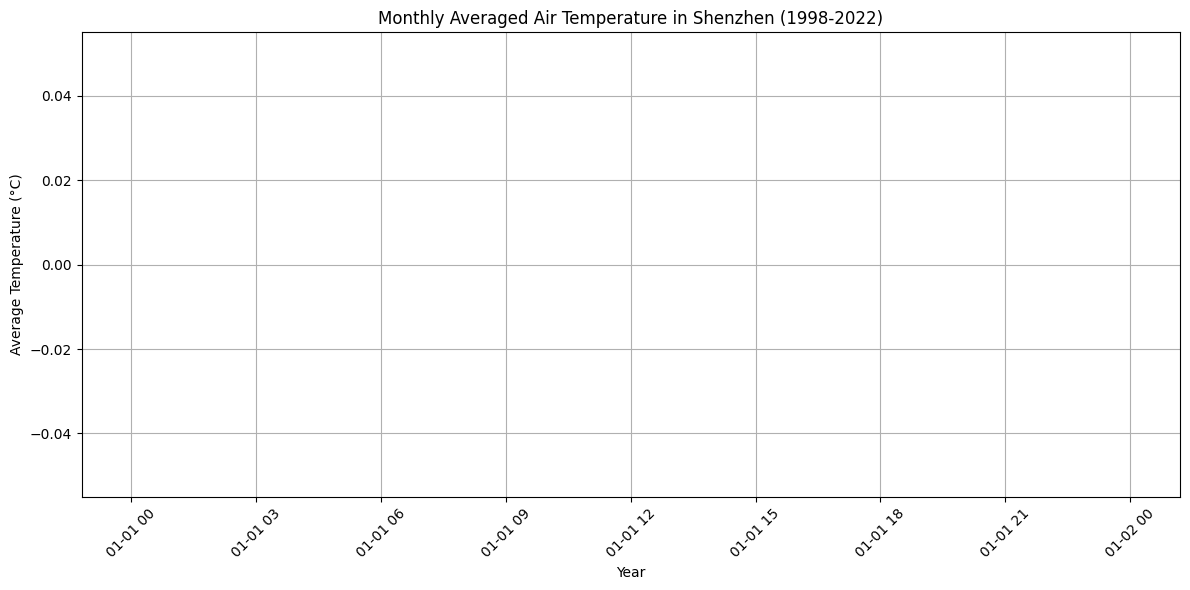

In [3]:
#2
import pandas as pd
import matplotlib.pyplot as plt

#Load the weather data
data=pd.read_csv('..\Assignment2_common_files\Baoan_Weather_1998_2022.csv')

#假设数据集中的TMP列被标记为'TMP'
#筛选出温度缺失或无效的行，
filtered_data=data[data['TMP'].notna()]

#确保'TMP'列是数值类型（需要将TMP进行分列，请教助教吴星沂）
# BUG: 可是代码里似乎没有分列啊，to_numeric 只是转换数据类型, 似乎代码没贴进来
# 另外，从图上来看似乎有异常值，温度还需要除以10
filtered_data['TMP']=pd.to_numeric(filtered_data['TMP'], errors='coerce')

#确保日期列存在并且是正确的格式
filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'], errors='coerce')

#日期列设置为索引
filtered_data.set_index('DATE', inplace=True)

#重新采样数据以计算月平均温度
monthly_avg_temp=filtered_data['TMP'].resample('M').mean()

#绘制月平均温度图
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-')
plt.title('Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the weather data
data=pd.read_csv('Baoan_Weather_1998_2022.csv')

#假设数据集中的TMP列被标记为'TMP'
#筛选出温度缺失或无效的行
filtered_data=data[data['TMP'].notna()]
# filtered_data['TMP']=pd.to_numeric(filtered_data['TMP'], errors='coerce')
filtered_data

C:\Users\24547\AppData\Local\Temp\ipykernel_15564\1012507536.py:5: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Baoan_Weather_1998_2022.csv')


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,REPORT_TYPE.1,SA1,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,SY-MT,NaN,"10184,1",4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1"
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1"
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1"
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,SY-MT,NaN,"10185,1",4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1"
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,FM-15,NaN,"99999,9",4,"+0210,1",NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1"
235670,59493099999,2022-10-10T21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,FM-12,NaN,"10177,1",4,"+0201,1",NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1"
235671,59493099999,2022-10-10T21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,FM-15,NaN,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1"
235672,59493099999,2022-10-10T22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,FM-15,NaN,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1"


In [332]:
#3
#3.1
import pandas as pd

#导入数据
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
#print(df['WMO_WIND'].dtype)确认WMO_WIND类型

#将WMO_WIND改变为可运算类型
df['WMO_WIND']=pd.to_numeric(df['WMO_WIND'], errors='coerce')
#print(df['WMO_WIND'].dtype)

#按SID分组，并根据WMO_WIND降序排序，然后取前10个
# top_10_hurricanes = df.groupby('SID').apply(lambda x: x.nlargest(1, 'WMO_WIND')).reset_index(drop=True).head(10)
top_10_hurricanes=df.groupby('SID')['WMO_WIND'].max().sort_values(ascending=False)#助教吴星沂帮助
top_10_hurricanes



C:\Users\24547\AppData\Local\Temp\ipykernel_15564\1177354721.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


SID
2015293N13266    185.0
1980214N11330    165.0
2019236N10314    160.0
1988253N12306    160.0
2005289N18282    160.0
                 ...  
2022275N10316      NaN
2022276N11337      NaN
2022279S10087      NaN
2022284N16268      NaN
2022286N15151      NaN
Name: WMO_WIND, Length: 13664, dtype: float64

In [218]:
#3.1
#将数据按SID分组，用agg做聚合操作（agg来自AI）
largest_hurricanes=df.groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'}).reset_index()
top_10_hurricanes=largest_hurricanes.nlargest(10, 'WMO_WIND')

print(top_10_hurricanes[['NAME', 'WMO_WIND']])

           NAME  WMO_WIND
12921  PATRICIA     185.0
9087      ALLEN     165.0
4105       None     160.0
10011   GILBERT     160.0
11067     LINDA     160.0
11944     WILMA     160.0
13307    DORIAN     160.0
11190     MITCH     155.0
11927      RITA     155.0
12337      RICK     155.0


           NAME  WMO_WIND
12921  PATRICIA     185.0
9087      ALLEN     165.0
4105       None     160.0
10011   GILBERT     160.0
11067     LINDA     160.0
11944     WILMA     160.0
13307    DORIAN     160.0
11190     MITCH     155.0
11927      RITA     155.0
12337      RICK     155.0
13098      IRMA     155.0
3880       None     150.0
5881      JANET     150.0
6311      PATSY     150.0
7532    CAMILLE     150.0
8722      ANITA     150.0
8985      DAVID     150.0
10476    ANDREW     150.0
10704      JOHN     150.0
11908   KATRINA     150.0


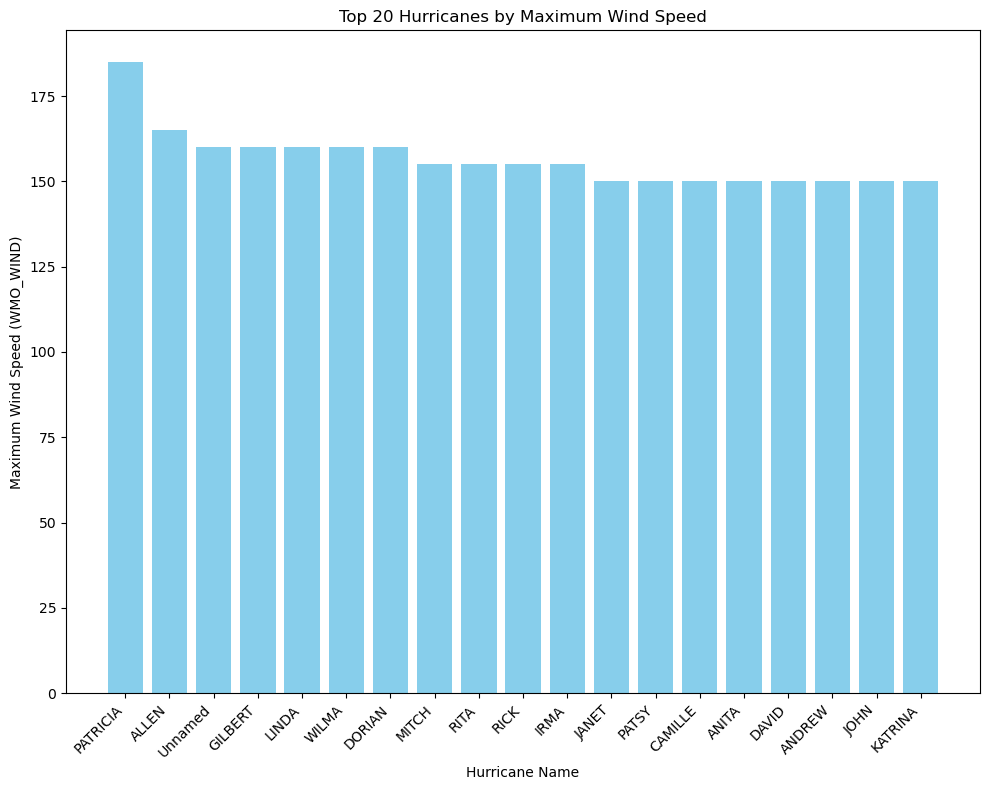

In [200]:
#3.2
import matplotlib.pyplot as plt

#找出风速最大的20个飓风
largest_hurricanes = df.groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'}).reset_index()
top_20_hurricanes = largest_hurricanes.nlargest(20, 'WMO_WIND')

#将NAME列中的None值替换为"Unnamed"
top_20_hurricanes['NAME'] = top_20_hurricanes['NAME'].fillna("Unnamed")

print(top_20_hurricanes[['NAME', 'WMO_WIND']])

# 绘制条形图
plt.figure(figsize=(10, 8))  # 设置图形的大小
plt.bar(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'], color='skyblue')  # 绘制条形图
plt.xlabel('Hurricane Name')  #x轴标签
plt.ylabel('Maximum Wind Speed (WMO_WIND)')  # y轴标签
plt.title('Top 20 Hurricanes by Maximum Wind Speed')  # 图形标题
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签，使其更容易阅读
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()  # 显示图形

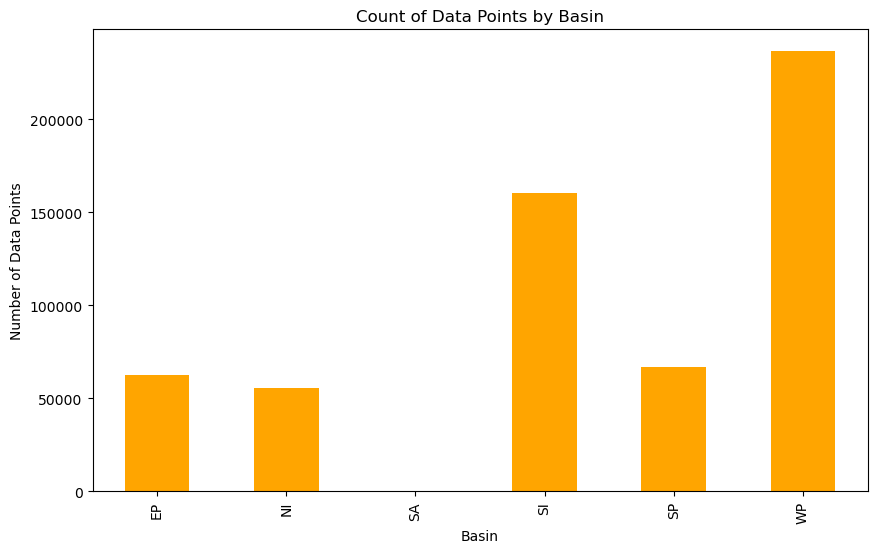

In [210]:
#3.3
#将数据按流域划分
basin_counts=df.groupby('BASIN').size()

#绘图
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='orange')
plt.xlabel('Basin')
plt.ylabel('Number of Data Points')
plt.title('Count of Data Points by Basin')
plt.show()

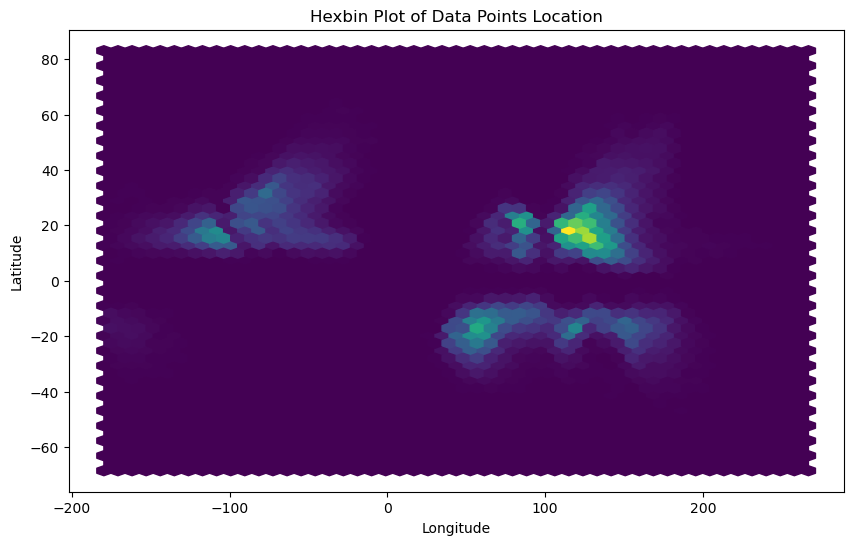

In [231]:
#3.4
#画六边形分箱图
plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=50)#用经纬度来绘制六边形分箱图
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points Location')
plt.show()

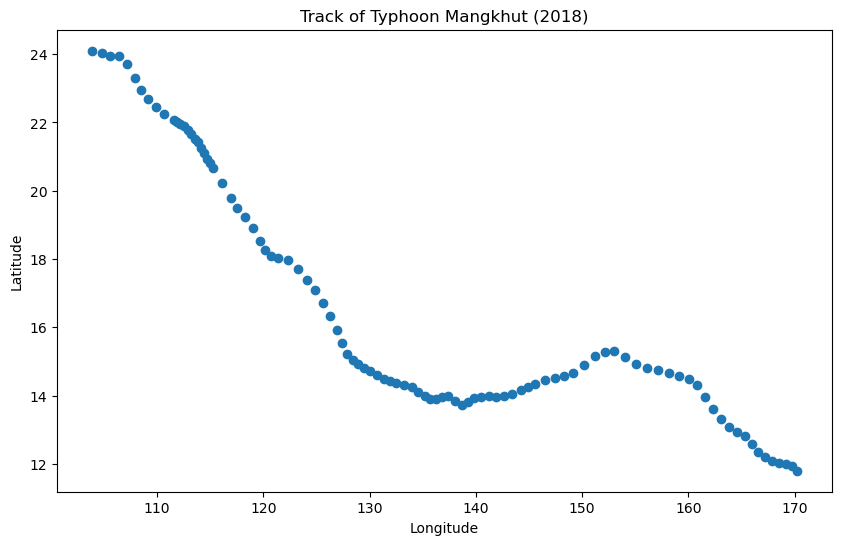

In [229]:
#3.5
#找到2018年的MANGKHUT
mangkhut_data=df[(df['NAME'] == 'MANGKHUT') & (df['ISO_TIME'].dt.year == 2018)]

#画出轨迹
plt.figure(figsize=(10, 6))
#利用散点图来画出轨迹，用经纬度来定点
plt.scatter(mangkhut_data['LON'], mangkhut_data['LAT'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.show()

In [237]:
#3.6
#选出1970年后的WP，EP
filtered_df=df[(df['ISO_TIME'].dt.year >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
filtered_df


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,,,PROVISIONAL,0,0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,,,PROVISIONAL,0,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,,,PROVISIONAL,1974,1952,P_____________


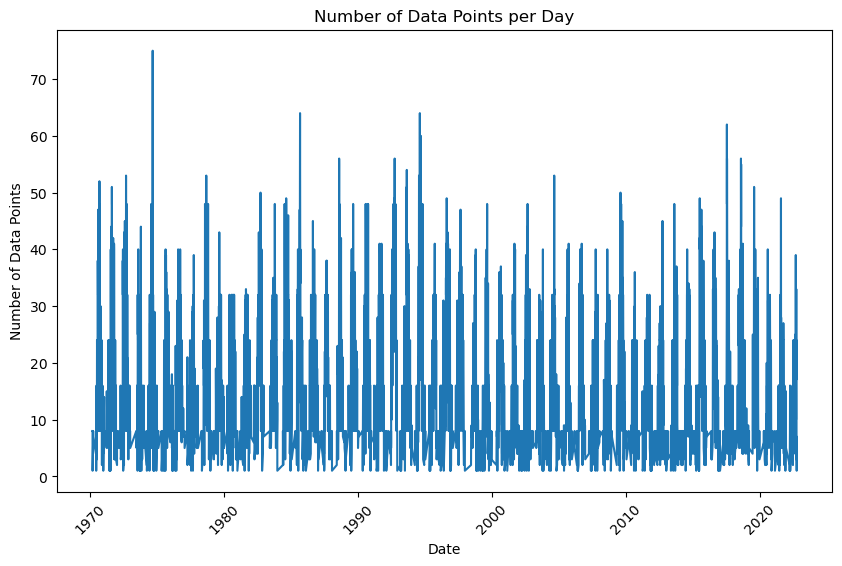

In [249]:
#3.7
#找出每天数据点的数量
daily_counts=filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()

#绘图
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Day')
plt.xticks(rotation=45)
plt.show()

In [345]:
#3.8
# 增加一列DOY
filtered_df['DOY']=filtered_df['ISO_TIME'].dt.dayofyear
#按天分组计算
doy_counts=filtered_df.groupby('DOY').size()
doy_counts


DOY
1       83
2       72
3       74
4       93
5      105
      ... 
362    158
363    132
364    104
365     93
366     13
Length: 366, dtype: int64

In [ ]:
#3.9
# NOTE: 似乎是统计1970年-2022年的每一天，而非1-365
#计算气候学的日平均值
climatology=doy_counts.mean()
#计算异常
anomalies=doy_counts-climatology
anomalies

DOY
1     -398.836066
2     -409.836066
3     -407.836066
4     -388.836066
5     -376.836066
          ...    
362   -323.836066
363   -349.836066
364   -377.836066
365   -388.836066
366   -468.836066
Length: 366, dtype: float64

C:\Users\24547\AppData\Local\Temp\ipykernel_15564\1872433389.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomalies = anomalies.resample('Y').sum()


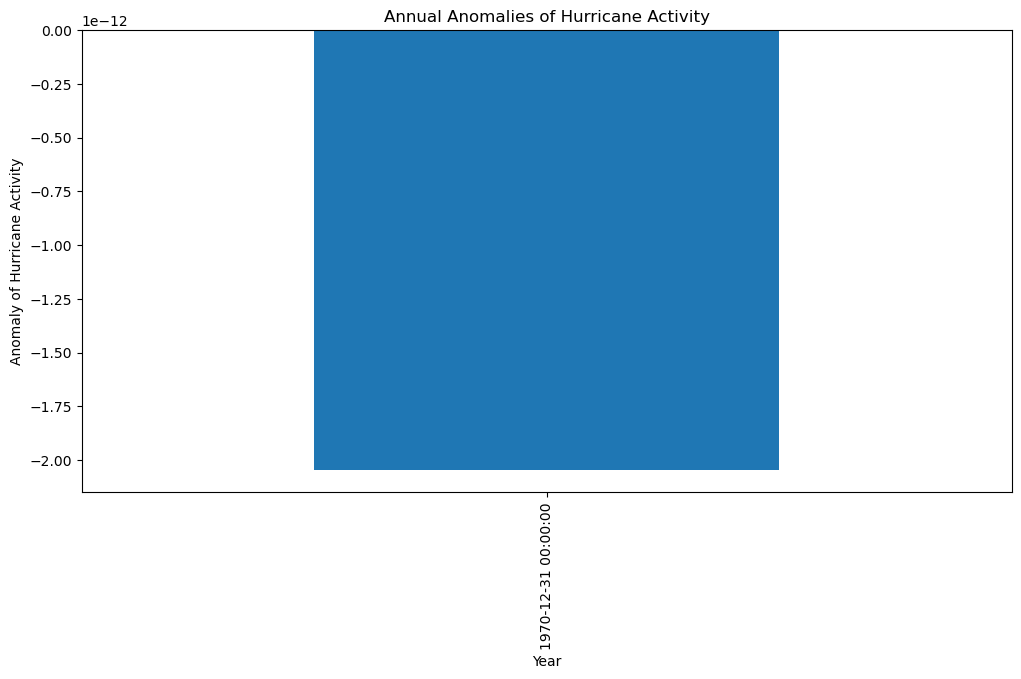

In [391]:
#3.10
#resample方法只能用于具有DatetimeIndex、TimedeltaIndex或PeriodIndex的Series或DataFrame对象，将索引转换为日期类型
anomalies.index=pd.to_datetime(anomalies.index)
annual_anomalies=anomalies.resample('Y').sum()

#绘图
plt.figure(figsize=(12, 6))
annual_anomalies.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Anomaly of Hurricane Activity')
plt.title('Annual Anomalies of Hurricane Activity')
plt.show()

In [379]:
#4
df = pd.read_excel('AGAGE-GCMD_CGO_ccl4.XLSX')
#df
#4.1
#去除空值
df_cleaned=df.dropna()
#使用info()函数检查数据类型和非空值的数量
df_cleaned.info()
#print("Cleaned dataset shape:", df_cleaned.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 295528 entries, 12 to 329113
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   #     time        295528 non-null  float64
 1   DD                295528 non-null  object 
 2   MM                295528 non-null  int64  
 3   YYYY              295528 non-null  int64  
 4   hh                295528 non-null  int64  
 5   mm                295528 non-null  int64  
 6   mole              295528 non-null  float64
 7   fraction          295528 non-null  float64
 8   repeability flag  295528 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 22.5+ MB


C:\Users\24547\AppData\Local\Temp\ipykernel_15564\117880284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['mole']=pd.to_datetime(df_cleaned['mole'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


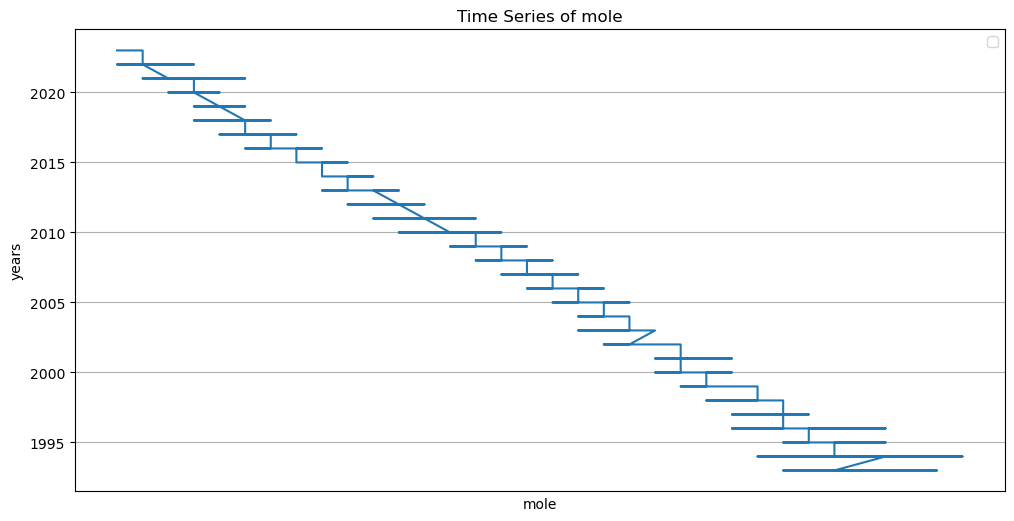

In [ ]:
#4.2
import matplotlib.pyplot as plt
# NOTE: 这样的可视化方式略奇怪
# Ensure the date column is in datetime format
df_cleaned['mole']=pd.to_datetime(df_cleaned['mole'])

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['mole'], df_cleaned['YYYY'])
plt.xlabel('mole')
plt.ylabel('years')
plt.title('Time Series of mole')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#4.3
# NOTE: YOUR FINDINGS
#计算基本统计值，进行比对
mean_mole = df_cleaned['mole'].mean()
median_mole = df_cleaned['mole'].median()
std_mole = df_cleaned['mole'].std()
min_mole = df_cleaned['mole'].min()
max_mole = df_cleaned['mole'].max()

print(mean_mole,median_mole,std_mole,min_mole,max_mole)

1970-01-01 00:00:00.000000086 1970-01-01 00:00:00.000000088 0 days 00:00:00.000000008 1970-01-01 00:00:00.000000072 1970-01-01 00:00:00.000000105
